In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly
from scipy.optimize import curve_fit

In [2]:
data = pd.read_excel('/home/mavi/Documentos/ast_obs1/data_correct.xlsx')
print(data)

   Galaxy name  abs_mag  app_mag  lambda_obsK  lambda_obsH
0        36747       21     15.6      4129.83      4166.50
1        36773       21     15.8      4125.83      4162.33
2        36805       21     15.4      4122.67      4170.17
3      NGC4874       21     12.9      4027.00      4062.67
4      NGC4889       21     12.5      4019.00      4054.50
5        51976       21     17.9      4445.00      4484.00
6        51975       21     18.5      4450.67      4490.00
7        54876       21     16.0      4205.33      4242.33
8        54875       21     16.9      4245.33      4282.83
9        54891       21     16.3      4223.50      4260.83
10     NGC7499       21     14.1      4087.00      4123.00
11     NGC7501       21     14.7      4101.00      4137.33
12     NGC7503       21     14.4      4107.00      4143.33


In [3]:
abs_mag = data['abs_mag']
app_mag = data['app_mag']
lambda_obsK = data['lambda_obsK']
lambda_obsH = data['lambda_obsH']

In [4]:
log_dist = (app_mag + abs_mag -25)/5
dist = np.power(10, log_dist)
dist

0     208.929613
1     229.086765
2     190.546072
3      60.255959
4      50.118723
5     602.559586
6     794.328235
7     251.188643
8     380.189396
9     288.403150
10    104.712855
11    138.038426
12    120.226443
dtype: float64

In [31]:
c = 299792
lambda_K = 3933.7
lambda_H = 3968.5

delta_lambdaH = lambda_obsH - lambda_H
delta_lambdaK = lambda_obsK - lambda_K

z_H = (delta_lambdaH/lambda_H)
z_K = (delta_lambdaK/lambda_K)

vel_H = z_H * c
vel_K = z_K * c

avg_velocity = (vel_H + vel_K)/2
print(avg_velocity)

0     14952.398525
1     14642.469177
2     14818.183649
3      7112.189973
4      6498.752422
5     38954.576009
6     39397.263464
7     20693.580416
8     23747.548161
9     22084.731003
10    11677.277581
11    12752.020867
12    13207.283170
dtype: float64


In [6]:
dist_extended = np.append(dist, 0)
velocity_ext = np.append(avg_velocity, 0)

print(velocity_ext)

[14952.3985255  14642.46917699 14818.18364929  7112.18997288
  6498.75242238 38954.57600905 39397.26346392 20693.58041646
 23747.54816137 22084.73100252 11677.27758116 12752.02086665
 13207.28316963     0.        ]


In [12]:
def linear_fit(x, a, b):
    return a*x + b

popt, pcov = curve_fit(linear_fit, dist_extended, velocity_ext)
popt

array([  49.36334512, 5127.53849835])

In [20]:
hubble_const = avg_velocity / dist

hubble = np.mean(hubble_const)
hubble


np.float64(85.4129893023214)

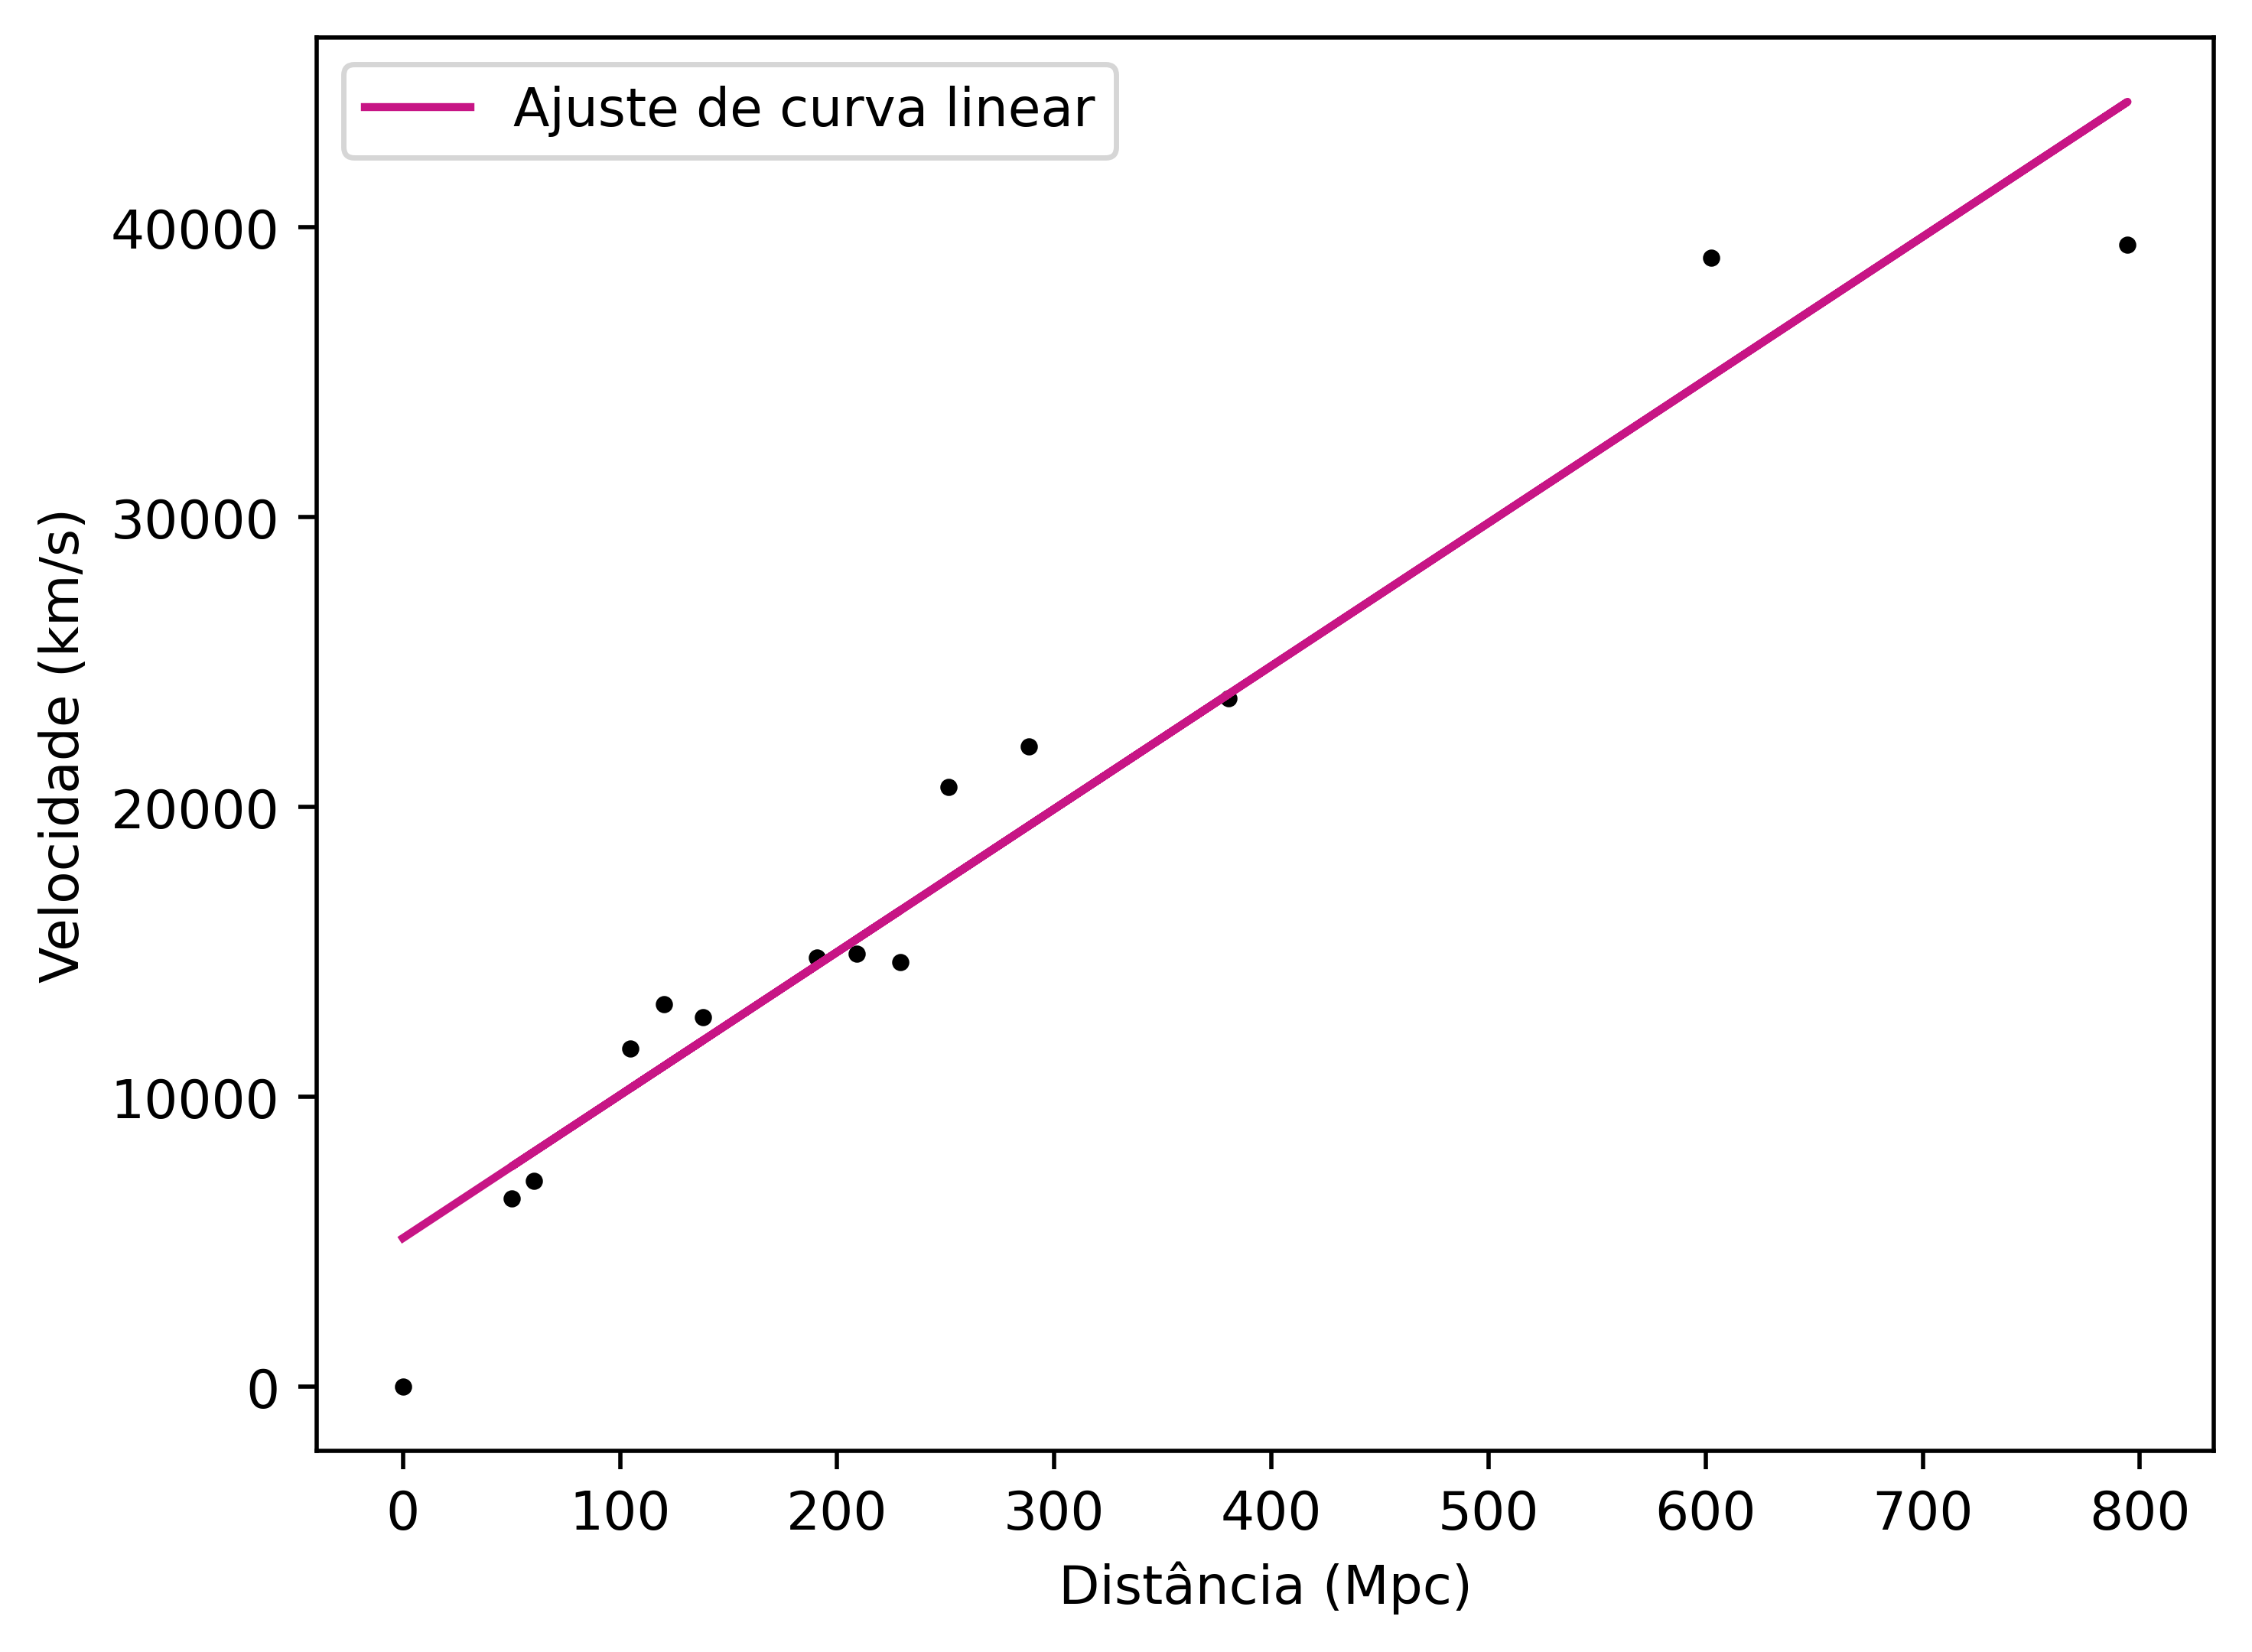

In [30]:
plt.figure(dpi=500)

plt.scatter(dist_extended, velocity_ext, color='black', s=5)
plt.plot(dist_extended, linear_fit(dist_extended, *popt), c='mediumvioletred', label='Ajuste de curva linear')
plt.ylabel('Velocidade (km/s)')
plt.xlabel('Distância (Mpc)')
plt.legend()

np.float64(0.02025794640748372)